# Kelly Criterion Calculator for a Bernoulli Bet

This notebook calculates the optimal proportion of money to bet on each round of a game using the Kelly Criterion formula.

**The Kelly Criterion Formula:**
```
f* = (bp - q) / b
```

Where:
- f* = fraction of capital to wager
- b = odds received on the wager (payout ratio)
- p = probability of winning
- q = probability of losing (1 - p)

In [358]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
plt.style.use('seaborn-v0_8')
import warnings
from matplotlib import MatplotlibDeprecationWarning

## Input Parameters

Set the probability of winning (e.g., probability of heads) using parameter p, and define the payout ratio (e.g., 1.0 means you win €1 for every €1 wagered) using parameter b below.

In [359]:
p = 0.55  
b = 1.0   
q=1-p

print(f"Probability of winning (p): {p}")
print(f"Probability of losing (q): {q:.2f}")
print(f"Payout ratio (b): {b}")

Probability of winning (p): 0.55
Probability of losing (q): 0.45
Payout ratio (b): 1.0


## Kelly Criterion Calculation

We define the function kelly_criterion(p, b), which calculates the optimal betting fraction according to the Kelly Criterion. The returned value represents the proportion of your bankroll that should be wagered to maximize long-term growth. If the calculated Kelly fraction is negative (i.e., the bet has a negative expected value), the function will return 0, meaning you should not place the bet.

In [360]:
def kelly_criterion(p, b):   
    q = 1 - p
    kelly_fraction = (b * p - q) / b
    return max(0, kelly_fraction) 

optimal_fraction = kelly_criterion(p, b)

print(f"Optimal betting fraction: {optimal_fraction:.4f}")
print(f"Optimal betting percentage: {optimal_fraction * 100:.2f}%")

if optimal_fraction > 0:
    print(f"\nFor a 100 euro bankroll:")
    print(f"Optimal bet amount: {optimal_fraction * 100:.2f} euros")
else:
    print(f"\nWarning: Negative Kelly fraction! This bet has negative expected value.")
    print(f"You should NOT place this bet.")

Optimal betting fraction: 0.1000
Optimal betting percentage: 10.00%

For a 100 euro bankroll:
Optimal bet amount: 10.00 euros


## Expected Value Analysis

- EV > 0: favorable bet (profitable in the long run) 
- EV < 0: unfavorable bet (expected loss) 
- EV = 0: break-even (fair odds)



In [361]:
expected_value = p * b - (1 - p)

print(f"Expected Value per euro bet: {expected_value:.4f}")
print(f"Expected Value percentage: {expected_value * 100:.2f}%")

if expected_value > 0:
    print("This is a favorable bet")
else:
    print("This is an unfavorable bet")

Expected Value per euro bet: 0.1000
Expected Value percentage: 10.00%
This is a favorable bet


## Sensitivity Analysis

Let's see how the optimal betting fraction changes with different probabilities setting payout ratio to 1:

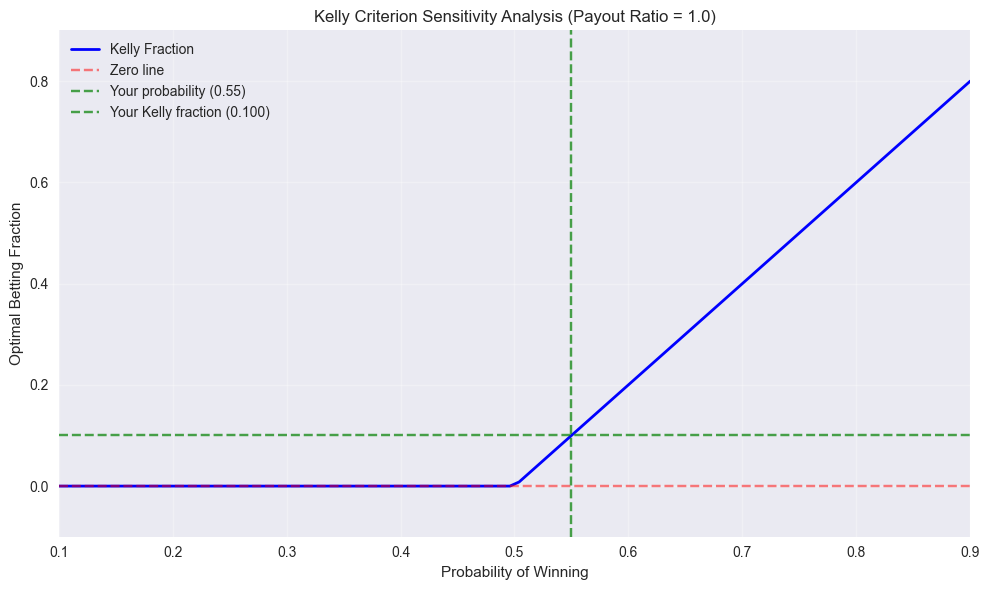

In [362]:
probabilities = np.linspace(0.1, 0.9, 100)
kelly_fractions = [kelly_criterion(p, b) for p in probabilities]

plt.figure(figsize=(10, 6))
plt.plot(probabilities, kelly_fractions, 'b-', linewidth=2, label='Kelly Fraction')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Zero line')
plt.axvline(x=p, color='g', linestyle='--', alpha=0.7, label=f'Your probability ({p})')
plt.axhline(y=optimal_fraction, color='g', linestyle='--', alpha=0.7, label=f'Your Kelly fraction ({optimal_fraction:.3f})')

plt.xlabel('Probability of Winning')
plt.ylabel('Optimal Betting Fraction')
plt.title(f'Kelly Criterion Sensitivity Analysis (Payout Ratio = {b})')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0.1, 0.9)
plt.ylim(-0.1, max(kelly_fractions) + 0.1)

plt.tight_layout()
plt.show()

## Interactive Calculator

Try different values of probability and payout ratio:

In [363]:
def analyze_bet(probability, payout_ratio, example_number, bankroll=100):
    kelly_frac = kelly_criterion(probability, payout_ratio)
    expected_val = probability * payout_ratio - (1 - probability)
    bet_amount = kelly_frac * bankroll
    
    print(f"\nExample {example_number}:")
    print(f"Probability of winning: {probability:.1%}")
    print(f"Payout ratio: {payout_ratio}:1")
    print(f"Expected value per euro: {expected_val:.4f}")
    print(f"\nKelly Criterion Results:")
    print(f"Optimal betting fraction: {kelly_frac:.1%}")
    print(f"Recommended bet amount (from €{bankroll}): €{bet_amount:.2f}")

print("Example scenarios:")
analyze_bet(0.51, 1.0, 1)  
analyze_bet(0.60, 1.0, 2)  
analyze_bet(0.55, 2.0, 3) 

Example scenarios:

Example 1:
Probability of winning: 51.0%
Payout ratio: 1.0:1
Expected value per euro: 0.0200

Kelly Criterion Results:
Optimal betting fraction: 2.0%
Recommended bet amount (from €100): €2.00

Example 2:
Probability of winning: 60.0%
Payout ratio: 1.0:1
Expected value per euro: 0.2000

Kelly Criterion Results:
Optimal betting fraction: 20.0%
Recommended bet amount (from €100): €20.00

Example 3:
Probability of winning: 55.0%
Payout ratio: 2.0:1
Expected value per euro: 0.6500

Kelly Criterion Results:
Optimal betting fraction: 32.5%
Recommended bet amount (from €100): €32.50


## Strategy Comparison: Kelly vs Fractional Kelly vs Fixed Betting

Now let's compare three different betting strategies:
1. **Full Kelly**: Bet the exact Kelly fraction
2. **Fractional Kelly**: Bet a fraction of the Kelly amount (more conservative)
3. **Fixed Betting**: Bet a fixed percentage of bankroll regardless of Kelly calculation

In [364]:
print(f"Strategy Betting Fractions (with p={p}, b={b}):")
print(f"Full Kelly: {optimal_fraction:.3f} ({optimal_fraction*100:.1f}%)")
print(f"Half Kelly: {optimal_fraction*0.5:.3f} ({optimal_fraction*0.5*100:.1f}%)")
print(f"Quarter Kelly: {optimal_fraction*0.25:.3f} ({optimal_fraction*0.25*100:.1f}%)")
print(f"Fixed 5%: 0.050 (5.0%)")
print(f"Fixed 20%: 0.200 (20.0%)")

Strategy Betting Fractions (with p=0.55, b=1.0):
Full Kelly: 0.100 (10.0%)
Half Kelly: 0.050 (5.0%)
Quarter Kelly: 0.025 (2.5%)
Fixed 5%: 0.050 (5.0%)
Fixed 20%: 0.200 (20.0%)


This code runs simulations with all strategies.

In [365]:
strategies = {
    'Full Kelly': {'type': 'kelly'},
    'Half Kelly': {'type': 'fractional_kelly', 'kelly_fraction': 0.5},
    'Quarter Kelly': {'type': 'fractional_kelly', 'kelly_fraction': 0.25},
    'Fixed 7.5%': {'type': 'fixed', 'fixed_percentage': 0.075},
    'Fixed 20%': {'type': 'fixed', 'fixed_percentage': 0.125},
}


def simulate_strategy(initial_bankroll, probability, payout_ratio, num_bets, strategy_type, **kwargs):

    bankroll = initial_bankroll
    bankroll_history = [bankroll]
    
    kelly_optimal = kelly_criterion(probability, payout_ratio)
    
    for bet_num in range(num_bets):

        if bankroll <= 0:
            bankroll_history.extend([0] * (num_bets - bet_num))
            break
            
        if strategy_type == 'kelly':
            bet_fraction = kelly_optimal

        elif strategy_type == 'fractional_kelly':
            kelly_fraction = kwargs.get('kelly_fraction', 0.075)
            bet_fraction = kelly_optimal * kelly_fraction

        elif strategy_type == 'fixed':
            bet_fraction = kwargs.get('fixed_percentage', 0.2)

        else:
            raise ValueError("Invalid strategy_type")
        
        bet_amount = bankroll * bet_fraction
        
        if np.random.random() < probability:
            bankroll += bet_amount * payout_ratio
        else:
            bankroll -= bet_amount
        
        bankroll_history.append(bankroll)
    
    return bankroll_history



### Single Simulation Comparison

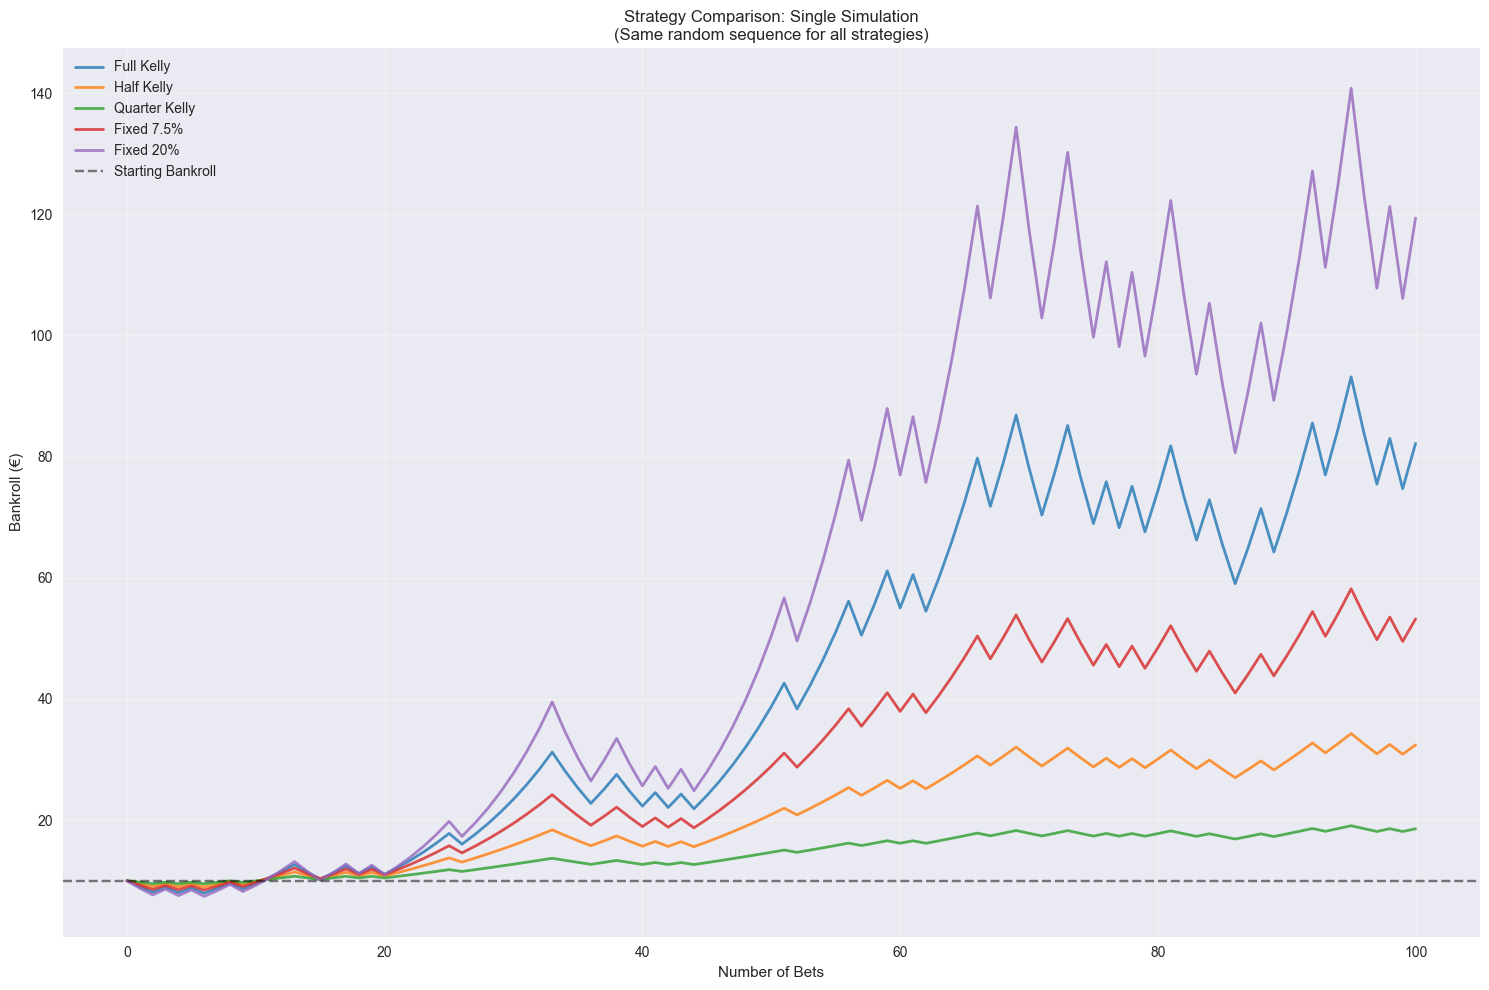


Final Bankroll Results (Single Simulation):
Full Kelly     : €   82.17 ( +721.7%)
Half Kelly     : €   32.41 ( +224.1%)
Quarter Kelly  : €   18.57 (  +85.7%)
Fixed 7.5%     : €   53.21 ( +432.1%)
Fixed 20%      : €  119.37 (+1093.7%)


In [366]:
np.random.seed(46)
initial_bankroll = 10
num_bets = 100

plt.figure(figsize=(15, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

strategy_results = {}

for i, (name, params) in enumerate(strategies.items()):
    np.random.seed(46)
    history = simulate_strategy(initial_bankroll, p, b, num_bets, params['type'], **{k:v for k,v in params.items() if k != 'type'})
    strategy_results[name] = history
    
    plt.plot(history, label=name, color=colors[i], linewidth=2, alpha=0.8)

plt.axhline(y=initial_bankroll, color='black', linestyle='--', alpha=0.5, label='Starting Bankroll')
plt.xlabel('Number of Bets')
plt.ylabel('Bankroll (€)')
plt.title('Strategy Comparison: Single Simulation\n(Same random sequence for all strategies)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('linear')
plt.tight_layout()
plt.show()

print("\nFinal Bankroll Results (Single Simulation):")
for name, history in strategy_results.items():
    final_bankroll = history[-1]
    total_return = (final_bankroll / initial_bankroll - 1) * 100
    print(f"{name:15}: €{final_bankroll:8.2f} ({total_return:+7.1f}%)")

### Monte Carlo Simulation: Multiple Runs

In [367]:

num_simulations = 1000
num_bets = 100

print(f"Running {num_simulations} simulations with {num_bets} bets each.")

monte_carlo_results = {name: [] for name in strategies.keys()}

for sim in range(num_simulations):   
    for name, params in strategies.items():
        history = simulate_strategy(initial_bankroll, p, b, num_bets, params['type'], **{k:v for k,v in params.items() if k != 'type'})
        final_bankroll = history[-1]
        monte_carlo_results[name].append(final_bankroll)

print("Simulation complete!")


Running 1000 simulations with 100 bets each.
Simulation complete!


### Statistical Analysis of Results

In [368]:
results_df = pd.DataFrame(monte_carlo_results)

stats_summary = pd.DataFrame({
    'Mean Final Bankroll': results_df.mean(),
    'Median Final Bankroll': results_df.median(),
    'Std Deviation': results_df.std(),
    'Min Bankroll': results_df.min(),
    'Max Bankroll': results_df.max(),
    'Probability of Profit': (results_df > initial_bankroll).mean(),
    'Probability of Ruin': (results_df <= 0.01).mean(),
    'Mean Return %': ((results_df.mean() / initial_bankroll - 1) * 100),
    'Median Return %': ((results_df.median() / initial_bankroll - 1) * 100)
})

print(f"Monte Carlo Results Summary ({num_simulations} simulations, {num_bets} bets each):")
print(f"Starting Bankroll: €{initial_bankroll}")
print(f"Win Probability: {p:.1%}")
print(f"Payout Ratio: {b}:1")
print(f"Kelly Optimal: {optimal_fraction:.1%}")
print()
display(stats_summary.round(2))

Monte Carlo Results Summary (1000 simulations, 100 bets each):
Starting Bankroll: €10
Win Probability: 55.0%
Payout Ratio: 1.0:1
Kelly Optimal: 10.0%



Monte Carlo Results Summary (1000 simulations, 100 bets each):
Starting Bankroll: €10
Win Probability: 55.0%
Payout Ratio: 1.0:1
Kelly Optimal: 10.0%



,Mean Final Bankroll,Median Final Bankroll,Std Deviation,Min Bankroll,Max Bankroll,Probability of Profit,Probability of Ruin,Mean Return %,Median Return %
Full Kelly,27.78,16.50,31.52,0.99,273.91,0.69,0.0,177.82,65.01
Half Kelly,16.35,14.55,8.98,3.24,107.72,0.75,0.0,63.47,45.54
Quarter Kelly,12.77,12.45,3.37,5.59,30.62,0.79,0.0,27.70,24.46
Fixed 7.5%,21.53,15.99,19.87,1.44,239.14,0.75,0.0,115.33,59.90
Fixed 20%,37.70,15.99,67.86,0.29,891.38,0.64,0.0,277.02,59.86


### Visualization: Distribution of Results

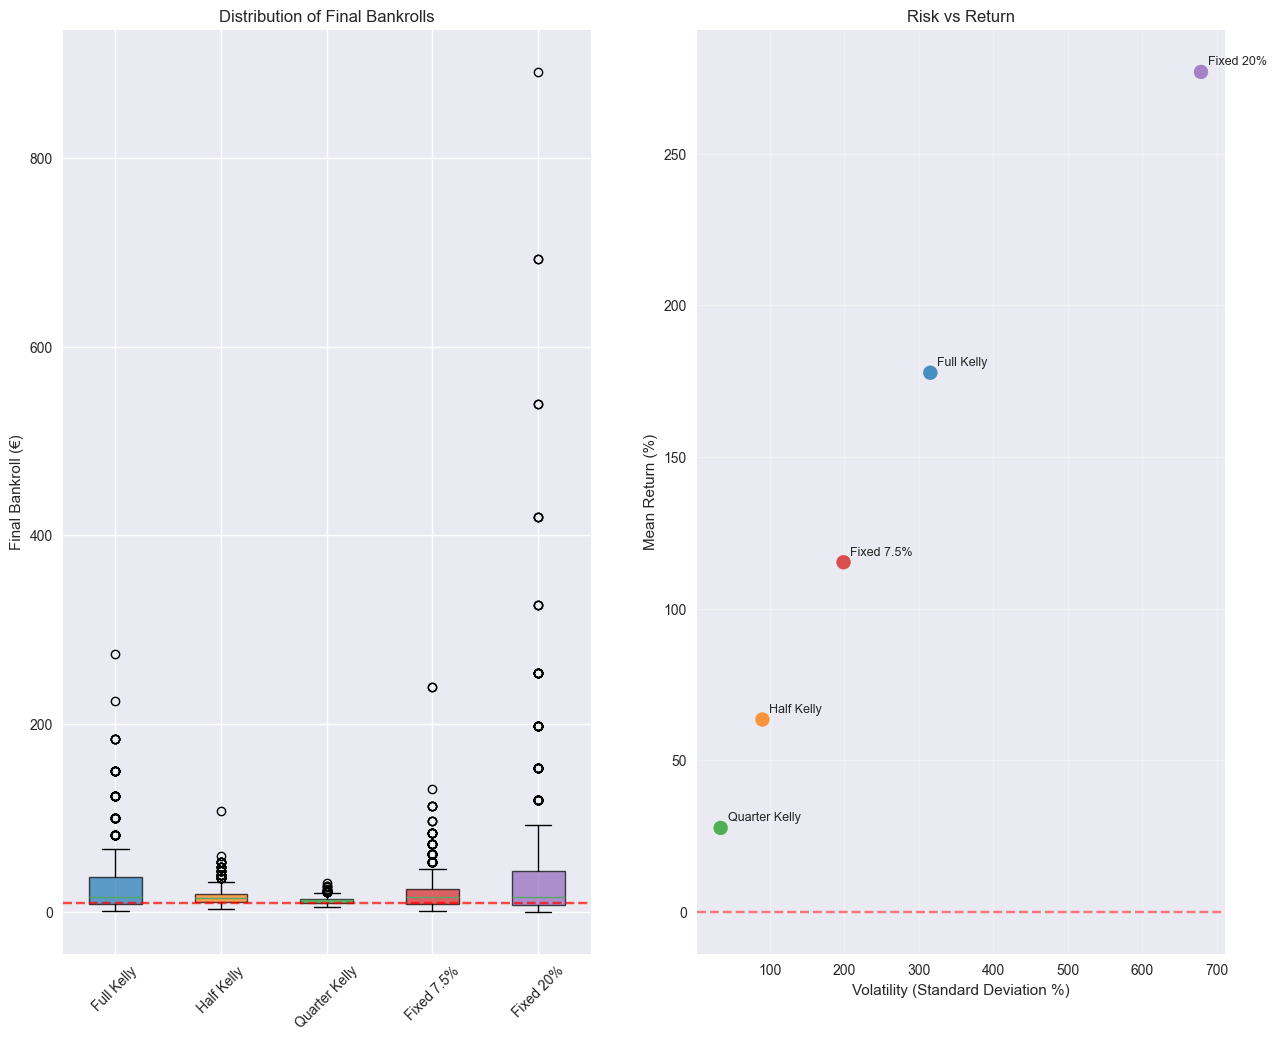

In [369]:
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

fig, axes = plt.subplots(1, 2, figsize=(15, 12))

ax1 = axes[0]
box_data = [monte_carlo_results[name] for name in strategies.keys()]
bp = ax1.boxplot(box_data, labels=list(strategies.keys()), patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax1.set_ylabel('Final Bankroll (€)')
ax1.set_title('Distribution of Final Bankrolls')
ax1.axhline(y=initial_bankroll, color='red', linestyle='--', alpha=0.7)
ax1.set_yscale('linear')
ax1.tick_params(axis='x', rotation=45)



ax2 = axes[1]
mean_returns = [(results_df[name].mean()/initial_bankroll - 1)*100 for name in strategies.keys()]
volatility = [(results_df[name].std()/initial_bankroll)*100 for name in strategies.keys()]
ax2.scatter(volatility, mean_returns, c=colors[:len(strategies)], s=100, alpha=0.8)
for i, name in enumerate(strategies.keys()):
    ax2.annotate(name, (volatility[i], mean_returns[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)
ax2.set_xlabel('Volatility (Standard Deviation %)')
ax2.set_ylabel('Mean Return (%)')
ax2.set_title('Risk vs Return')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)


plt.show()

### Strategy Performance Rankings

In [ ]:
performance_metrics = pd.DataFrame({
    'Strategy': list(strategies.keys()),
    'Mean Return %': [((results_df[name].mean() / initial_bankroll - 1) * 100) for name in strategies.keys()],
    'Median Return %': [((results_df[name].median() / initial_bankroll - 1) * 100) for name in strategies.keys()],
    'Volatility %': [(results_df[name].std() / initial_bankroll * 100) for name in strategies.keys()],
    'Sharpe Ratio': [((results_df[name].mean() / initial_bankroll - 1) / (results_df[name].std() / initial_bankroll)) for name in strategies.keys()],
    'Prob Profit %': [(results_df[name] > initial_bankroll).mean() * 100 for name in strategies.keys()],
    'Prob Ruin %': [(results_df[name] <= 0.01).mean() * 100 for name in strategies.keys()],
    'Max Drawdown %': [((initial_bankroll - results_df[name].min()) / initial_bankroll * 100) for name in strategies.keys()]
})

performance_metrics = performance_metrics.sort_values('Sharpe Ratio', ascending=False)

print("\nStrategy Performance Ranking (by Sharpe Ratio):")
display(performance_metrics.round(2))


print("Key Insights:")
best_return = performance_metrics.loc[performance_metrics['Mean Return %'].idxmax(), 'Strategy']
best_sharpe = performance_metrics.iloc[0]['Strategy']
safest = performance_metrics.loc[performance_metrics['Prob Ruin %'].idxmin(), 'Strategy']
lowest_vol = performance_metrics.loc[performance_metrics['Volatility %'].idxmin(), 'Strategy']

print(f"Highest Mean Return: {best_return}")
print(f"Best Risk-Adjusted Return (Sharpe): {best_sharpe}")
print(f"Lowest Risk of Ruin: {safest}")
print(f"Lowest Volatility: {lowest_vol}")

print("\n Recommendations:")
if best_sharpe == 'Full Kelly':
    print("• Full Kelly provides the best risk-adjusted returns for these parameters")
elif 'Kelly' in best_sharpe:
    print(f"• {best_sharpe} offers the best balance of return and risk")
    print("• Fractional Kelly strategies reduce volatility while maintaining good returns")
else:
    print(f"• {best_sharpe} performs best, suggesting the Kelly edge isn't strong enough")

max_ruin_rate = performance_metrics['Prob Ruin %'].max()
if max_ruin_rate > 10:
    print(f"• High ruin risk detected (up to {max_ruin_rate:.1f}%) - consider more conservative strategies")
    
print("\n• For conservative investors: Consider Fixed 5% or Quarter Kelly")
print("• For aggressive investors: Full Kelly or Half Kelly may be appropriate")
print("• Always consider your risk tolerance and never bet money you can't afford to lose")


Strategy Performance Ranking (by Sharpe Ratio):



Strategy Performance Ranking (by Sharpe Ratio):


,Strategy,Mean Return %,Median Return %,Volatility %,Sharpe Ratio,Prob Profit %,Prob Ruin %,Max Drawdown %
2,Quarter Kelly,27.70,24.46,33.72,0.82,79.4,0.0,44.09
1,Half Kelly,63.47,45.54,89.79,0.71,75.4,0.0,67.57
3,Fixed 7.5%,115.33,59.90,198.73,0.58,74.7,0.0,85.56
0,Full Kelly,177.82,65.01,315.23,0.56,68.9,0.0,90.06
4,Fixed 20%,277.02,59.86,678.65,0.41,63.9,0.0,97.13


Key Insights:
Highest Mean Return: Fixed 20%
Best Risk-Adjusted Return (Sharpe): Quarter Kelly
Lowest Risk of Ruin: Quarter Kelly
Lowest Volatility: Quarter Kelly

 Recommendations:
• Quarter Kelly offers the best balance of return and risk
• Fractional Kelly strategies reduce volatility while maintaining good returns

• For conservative investors: Consider Fixed 5% or Quarter Kelly
• For aggressive investors: Full Kelly or Half Kelly may be appropriate
• Always consider your risk tolerance and never bet money you can't afford to lose


Theoretical Growth Rate:
Full Kelly     : f=0.100, Growth Rate=0.005008
Half Kelly     : f=0.050, Growth Rate=0.003753
Quarter Kelly  : f=0.025, Growth Rate=0.002188
Fixed 5%       : f=0.050, Growth Rate=0.003753
Fixed 10%      : f=0.100, Growth Rate=0.005008


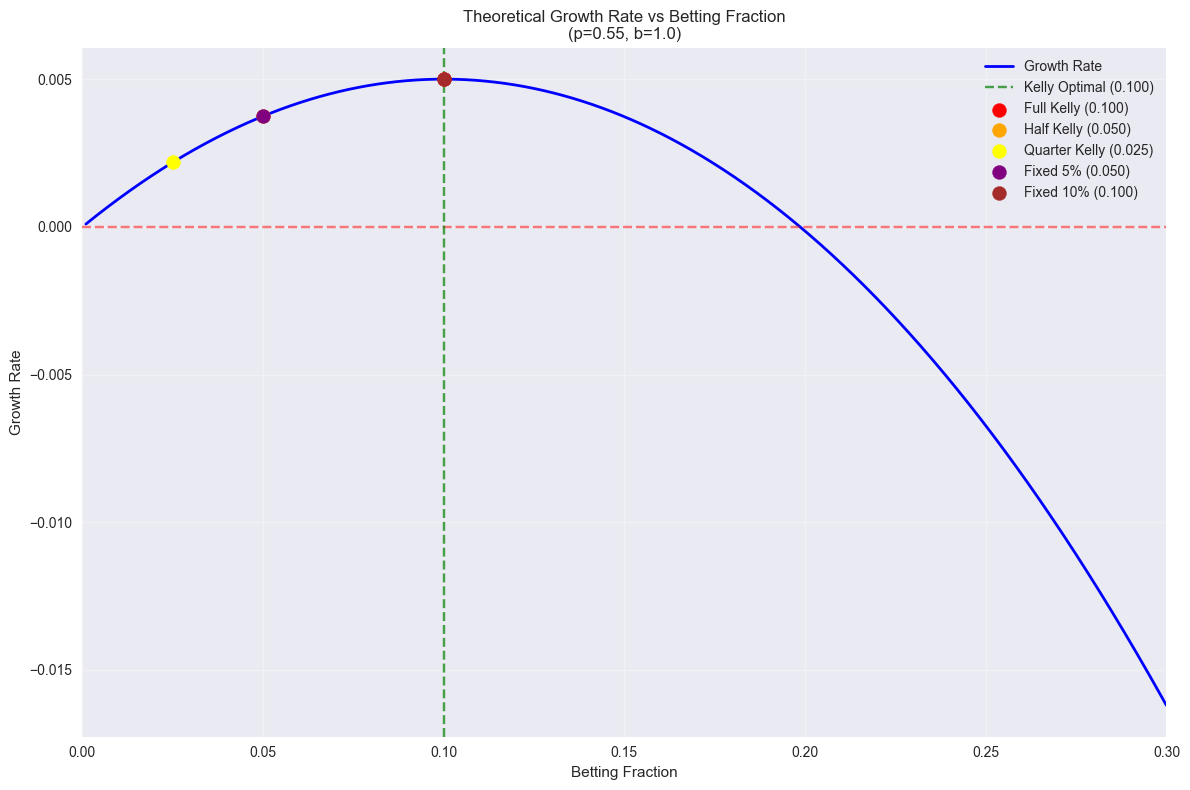


Optimal Kelly fraction 0.100 maximizes the growth rate at 0.005008


In [371]:
def theoretical_growth_rate(p, b, f):  
    if f <= 0:
        return 0
    if f >= 1: 
        return -np.inf
    
    try:
        growth = p * np.log(1 + b * f) + (1 - p) * np.log(1 - f)
        return growth
    except Exception as e:
        print(f"Error calculating growth rate: {e}")
        return -np.inf

print("Theoretical Growth Rate:")

strategy_fractions = {
    'Full Kelly': optimal_fraction,
    'Half Kelly': optimal_fraction * 0.5,
    'Quarter Kelly': optimal_fraction * 0.25,
    'Fixed 5%': 0.05,
    'Fixed 10%': 0.10
}

for name, fraction in strategy_fractions.items():
    growth_rate = theoretical_growth_rate(p, b, fraction)
    print(f"{name:15}: f={fraction:.3f}, Growth Rate={growth_rate:.6f}")

fractions = np.linspace(0.001, 0.3, 1000)
growth_rates = [theoretical_growth_rate(p, b, f) for f in fractions]

plt.figure(figsize=(12, 8))
plt.plot(fractions, growth_rates, 'b-', linewidth=2, label='Growth Rate')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=optimal_fraction, color='g', linestyle='--', alpha=0.7, 
           label=f'Kelly Optimal ({optimal_fraction:.3f})')

colors_strategy = ['red', 'orange', 'yellow', 'purple', 'brown']
for i, (name, fraction) in enumerate(strategy_fractions.items()):
    growth = theoretical_growth_rate(p, b, fraction)
    plt.scatter(fraction, growth, color=colors_strategy[i], s=100, 
               label=f'{name} ({fraction:.3f})', zorder=5)

plt.xlabel('Betting Fraction')
plt.ylabel('Growth Rate')
plt.title(f'Theoretical Growth Rate vs Betting Fraction\n(p={p}, b={b})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.3)
plt.tight_layout()
plt.show()

print(f"\nOptimal Kelly fraction {optimal_fraction:.3f} maximizes the growth rate at {theoretical_growth_rate(p, b, optimal_fraction):.6f}")

## Strategy Comparison Results:

Based on our comprehensive analysis of Kelly, fractional Kelly, and fixed betting strategies:

### Key Findings:

1. **Kelly Criterion Optimization**: The full Kelly strategy mathematically maximizes long-term growth rate
2. **Risk vs Reward Trade-off**: Fractional Kelly strategies reduce volatility at the cost of lower expected returns
3. **Fixed Strategies**: May outperform when Kelly edge is small or estimation errors are high
4. **Practical Considerations**: Real-world implementation often benefits from fractional Kelly approaches

### Strategy Recommendations by Risk Profile:

- **Conservative Investors**: Fixed 5% or Quarter Kelly for lower volatility
- **Moderate Risk Tolerance**: Half Kelly for balanced risk-return profile
- **Aggressive Investors**: Full Kelly for maximum theoretical growth (if edge is certain)

### Important Caveats:

- Kelly assumes perfect knowledge of probabilities (rarely true in practice)
- Estimation errors can significantly impact performance
- Psychological factors and betting limits affect real-world implementation
- Past performance doesn't guarantee future results

### Final Recommendations:

1. **Use Fractional Kelly**: Start with 25-50% of full Kelly to reduce risk
2. **Regular Recalibration**: Update probabilities and adjust strategy based on new information
3. **Risk Management**: Set stop-loss limits and position sizing rules
4. **Diversification**: Don't put all capital into a single betting strategy
